In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import preprocessing as prep
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("Dataset_.csv")
df = df.drop(columns=['Day', 'Type'])
print(df)
to_model_columns = df.columns

       F0     Fj     Fm     FI  F300mks  F50mks  t(Fm)        Vj        VI  \
0   0.810  1.652  3.203  2.749    1.562   0.942    166  0.351860  0.810280   
1   0.770  1.700  3.065  2.623    1.522   0.896    152  0.405229  0.807407   
2   0.800  1.701  2.981  2.680    1.528   0.894    195  0.413113  0.861990   
3   0.783  1.714  3.010  2.682    1.631   0.932    168  0.418051  0.852717   
4   0.879  1.805  2.016  1.914    1.678   1.061    116  0.814424  0.910290   
..    ...    ...    ...    ...      ...     ...    ...       ...       ...   
56  0.744  1.618  2.922  2.585    1.458   0.847    163  0.401286  0.845271   
57  0.827  1.941  2.800  2.616    1.721   0.947    130  0.564622  0.906741   
58  0.756  1.757  2.719  2.501    1.751   0.861    145  0.509934  0.888945   
59  0.710  1.456  2.818  2.454    1.304   0.790    163  0.353890  0.827324   
60  0.830  1.902  2.745  2.570    1.722   0.949    132  0.559791  0.908616   

    phi P0 (Fv/Fm)  ...    TR0/RC    DI0/RC    ET0/RC    RE0/RC

In [130]:
#x = RobustScaler().fit_transform(df)
x = StandardScaler().fit_transform(df)
#x = MinMaxScaler().fit_transform(df)
print(len(x))
i=0
DF = pd.DataFrame()
for column in df.columns:
    series = pd.Series(x[:,i])
    DF.insert(i,column,series)
    i+=1
print(DF)

61
          F0        Fj        Fm        FI   F300mks    F50mks     t(Fm)  \
0   0.262939  0.104620  1.678068  1.300215  0.261811  0.382466  0.411486   
1  -0.098103  0.326437  1.268537  0.856298  0.083020  0.045723 -0.027775   
2   0.172679  0.331058  1.019256  1.057118  0.109839  0.031082  1.321383   
3   0.019236  0.391133  1.105317  1.064164  0.570225  0.309261  0.474237   
4   0.885736  0.811659 -1.844498 -1.641614  0.780305  1.253606 -1.157303   
..       ...       ...       ...       ...       ...       ...       ...   
56 -0.332780 -0.052500  0.844167  0.722419 -0.203045 -0.312981  0.317358   
57  0.416382  1.440139  0.482117  0.831636  0.972505  0.419069 -0.718042   
58 -0.224467  0.589843  0.241740  0.426474  1.106598 -0.210494 -0.247406   
59 -0.639665 -0.801129  0.535534  0.260886 -0.891389 -0.730250  0.317358   
60  0.443460  1.259913  0.318898  0.669571  0.976975  0.433710 -0.655291   

          Vj        VI  phi P0 (Fv/Fm)  ...    TR0/RC    DI0/RC    ET0/RC  \
0  -1.1

In [131]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(4/61), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(DF[DF.columns])
pred = clf.predict(DF[DF.columns])
DF['anomaly']=pred
outliers=DF.loc[DF['anomaly']==-1]
outlier_index=list(outliers.index)
print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(DF['anomaly'].value_counts())

[4, 5, 6, 7]
 1    57
-1     4
Name: anomaly, dtype: int64


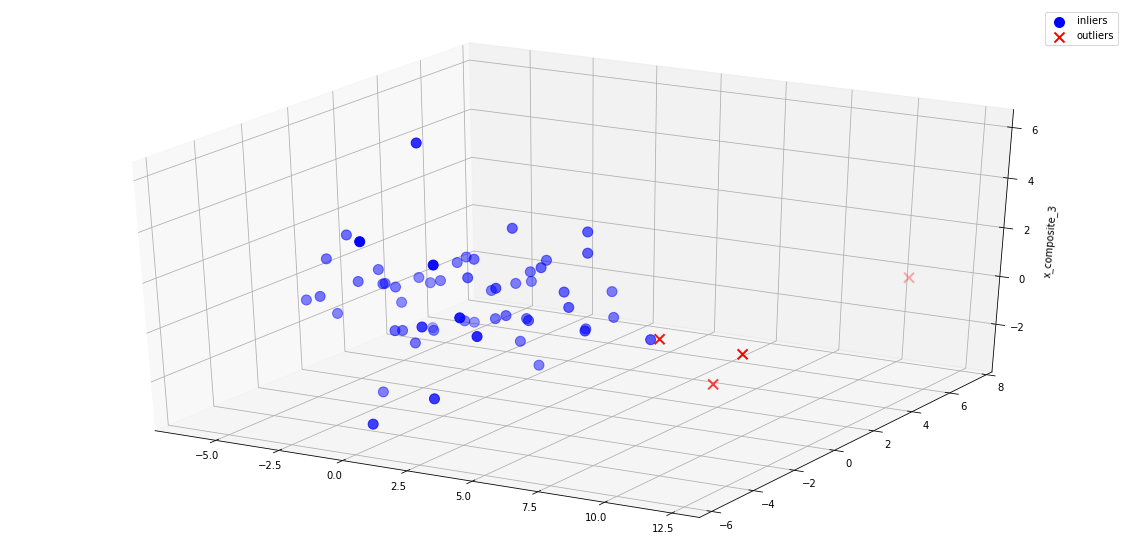

In [132]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()
#normalize the metrics
X = scaler.fit_transform(DF[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
X_reduce0 = np.delete(X_reduce,outlier_index, axis=0)

ax.scatter(X_reduce0[:, 0], X_reduce0[:, 1], zs=X_reduce0[:, 2], s=100, marker="o", lw=1, label="inliers",c="blue")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=100, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

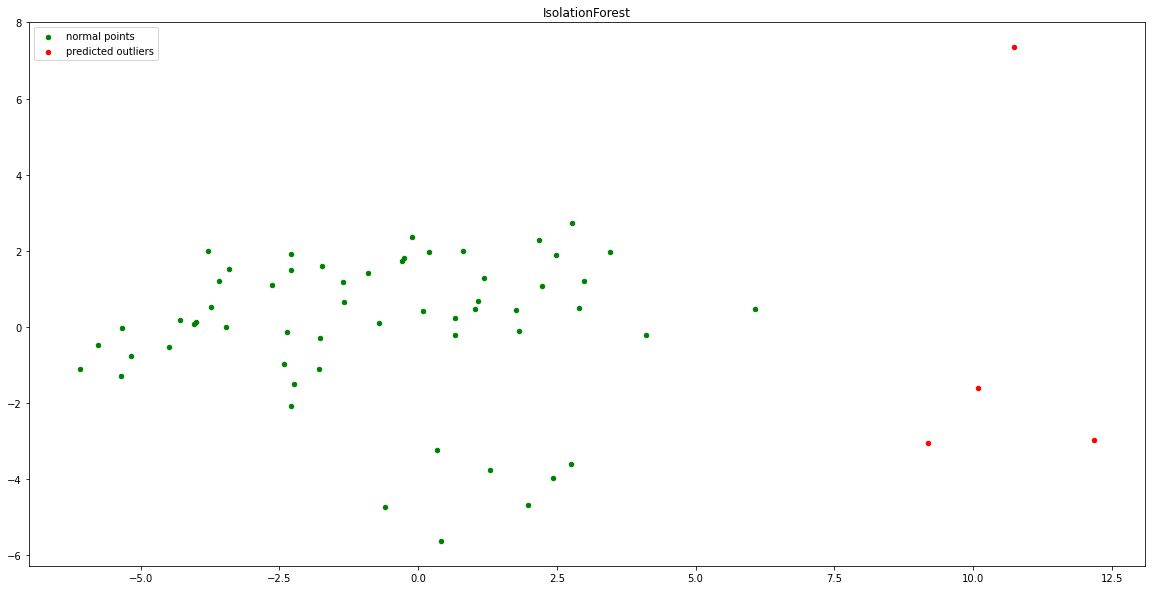

In [133]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(DF[to_model_columns])
res=pd.DataFrame(pca.transform(DF[to_model_columns]))
res1 = res.drop(outlier_index)
Z = np.array(res)
plt.figure(figsize=(20,10))
plt.title("IsolationForest")
#plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res1[0], res1[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper left")
plt.show()